# Checkpoint 10
## Discoveries, Exclusion, and Upper Limits

### Problem 1: The Frequentist method (3 points)
For this problem we will be using Eq. (1). We want to plot the classical Frequentist
n_s upper vs. n_b curve for β = 0.05 (i.e. 95% C.L.) and for the nobs = 0 through 6 range
of possible observed-number-of-events values.
To work out the (nb, n_s upper) pairs, we notice that we have to calculate the sum of
Poisson probabilities from n = 0 to nobs with a Poisson mean of n_s upper + nb
(for n_obs = 6, these are 1 + 6 probabilities), and find the values n_s upper
for which β = 0.05. We will solve this numerically.

 -  Create a Frequentist class. Write a beta(N obs, mean) method that returns
the sum of Poisson probabilities between 0 and N_obs inclusive. Notice that
this is simply Eq. (1).

 - Write a loop over nb, n_s upper
for nobs = 6 that scans these variables from zero
up to a maxium value with a step of 0.1. For each (n_s upper, nb) pair, calculate
the probability β. When β is “very close” to the target 5%, store the pair
into an array. For this problem, you can safely stay below (nb)_max = 15 and
(n_s upper)_max = 15.
 - Plot the n_s upper vs. n_b curves on the same graph with nobs ranging from 6 down
to 0.


In [2]:
# preamble
from scipy.stats import poisson
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# create a frequentist class
class Frequentist:

    @staticmethod
    def beta(N_obs, mean):
        ns = np.arange(0, N_obs+1)
        return np.sum(poisson.pmf(ns, mu=mean))

In [4]:
n_b = np.arange(16,step=0.1)
n_s = np.arange(16, step=0.1)
combinations = np.array(np.meshgrid(n_b, n_s))
combinations = combinations.T.reshape(-1, 2)
pairs = []
for signal, background in combinations:
    if np.isclose(Frequentist.beta(6, signal + background), 0.05, rtol=0.05):
        pairs.append([signal, background])
print(pairs)

[[0.0, 11.8], [0.0, 11.9], [0.1, 11.700000000000001], [0.1, 11.8], [0.2, 11.600000000000001], [0.2, 11.700000000000001], [0.30000000000000004, 11.5], [0.30000000000000004, 11.600000000000001], [0.4, 11.4], [0.4, 11.5], [0.5, 11.3], [0.5, 11.4], [0.6000000000000001, 11.200000000000001], [0.6000000000000001, 11.3], [0.7000000000000001, 11.100000000000001], [0.7000000000000001, 11.200000000000001], [0.8, 11.0], [0.8, 11.100000000000001], [0.9, 10.9], [0.9, 11.0], [1.0, 10.8], [1.0, 10.9], [1.1, 10.700000000000001], [1.1, 10.8], [1.2000000000000002, 10.600000000000001], [1.2000000000000002, 10.700000000000001], [1.3, 10.5], [1.3, 10.600000000000001], [1.4000000000000001, 10.4], [1.4000000000000001, 10.5], [1.5, 10.3], [1.5, 10.4], [1.6, 10.200000000000001], [1.6, 10.3], [1.7000000000000002, 10.100000000000001], [1.7000000000000002, 10.200000000000001], [1.8, 10.0], [1.8, 10.100000000000001], [1.9000000000000001, 9.9], [1.9000000000000001, 10.0], [2.0, 9.8], [2.0, 9.9], [2.1, 9.700000000000

In [18]:
n_obs = np.arange(7)
results = {}
for observed in n_obs:
    n_upper = []
    n_back =[]
    for signal, background in combinations:
        if np.isclose(Frequentist.beta(observed, signal + background), 0.05, rtol=0.08):
            n_upper.append(signal)
            n_back.append(background)
    results[observed] = (n_upper, n_back)

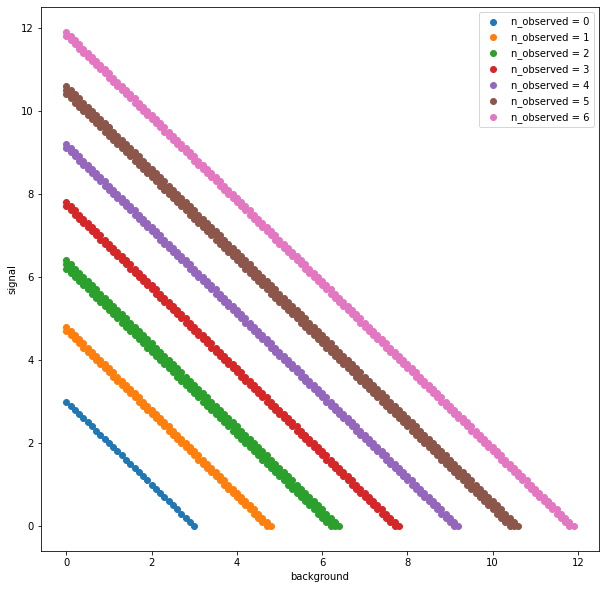

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
for observed, result in results.items():
    ax.scatter(result[1], result[0], label=f"n_observed = {observed}")
ax.legend()
ax.set_xlabel("background")
ax.set_ylabel("signal")
plt.show()

### Problem #2: The Bayesian method (2 points)

Repeat the previous exercise by creating a Bayesian class (it will be more efficient
if you start with the existing Frequentist class, since a lot of code would be
common).

The structure of the programme should be the same, with the exception that the
beta(N obs, mean) method implementing the expression in Eq. (1) must be replaced by a beta(N obs, n s, n b) method implementing that in Eq. (4).

Can you confirm that the Bayesian upper limits are more conservative than the
Frequentist ones?

In [7]:
class Bayesian:
    @staticmethod
    def beta(N_obs, n_s, n_b):
        ns = np.arange(0, N_obs+1)
        return np.sum(poisson.pmf(ns, n_s + n_b)) / np.sum(poisson.pmf(ns, n_b))
        
        

[[4.3, 15.700000000000001], [4.3, 15.8], [4.3, 15.9], [4.4, 14.8], [4.4, 14.9], [4.4, 15.0], [4.4, 15.100000000000001], [4.4, 15.200000000000001], [4.4, 15.3], [4.4, 15.4], [4.4, 15.5], [4.4, 15.600000000000001], [4.4, 15.700000000000001], [4.4, 15.8], [4.4, 15.9], [4.5, 13.9], [4.5, 14.0], [4.5, 14.100000000000001], [4.5, 14.200000000000001], [4.5, 14.3], [4.5, 14.4], [4.5, 14.5], [4.5, 14.600000000000001], [4.5, 14.700000000000001], [4.5, 14.8], [4.5, 14.9], [4.5, 15.0], [4.6000000000000005, 13.200000000000001], [4.6000000000000005, 13.3], [4.6000000000000005, 13.4], [4.6000000000000005, 13.5], [4.6000000000000005, 13.600000000000001], [4.6000000000000005, 13.700000000000001], [4.6000000000000005, 13.8], [4.6000000000000005, 13.9], [4.6000000000000005, 14.0], [4.6000000000000005, 14.100000000000001], [4.6000000000000005, 14.200000000000001], [4.7, 12.5], [4.7, 12.600000000000001], [4.7, 12.700000000000001], [4.7, 12.8], [4.7, 12.9], [4.7, 13.0], [4.7, 13.100000000000001], [4.7, 13.20

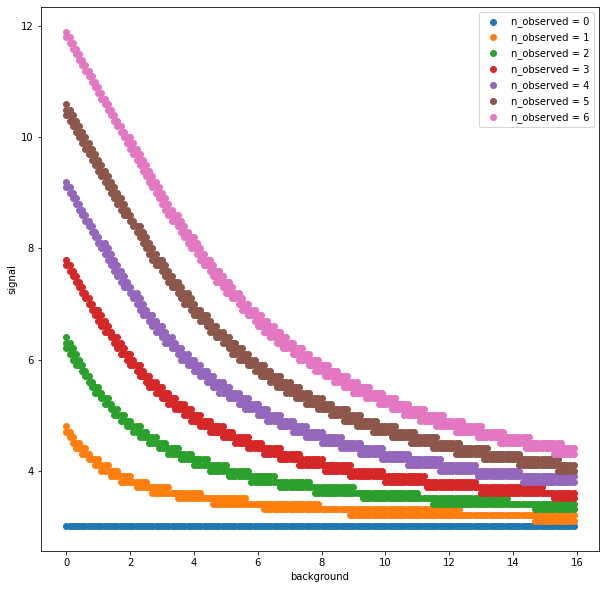

In [22]:
n_b = np.arange(16,step=0.1)
n_s = np.arange(16, step=0.1)
combinations = np.array(np.meshgrid(n_b, n_s))
combinations = combinations.T.reshape(-1, 2)
pairs = []
for signal, background in combinations:
    if np.isclose(Bayesian.beta(6, signal,  background), 0.05, rtol=0.05):
        pairs.append([signal, background])
print(pairs)
n_obs = np.arange(7)
results = {}
for observed in n_obs:
    n_upper = []
    n_back =[]
    for signal, background in combinations:
        if np.isclose(Bayesian.beta(observed, signal, background), 0.05, rtol=0.08):
            n_upper.append(signal)
            n_back.append(background)
    results[observed] = (n_upper, n_back)
fig, ax = plt.subplots(figsize=(10,10))
for observed, result in results.items():
    ax.scatter(result[1], result[0], label=f"n_observed = {observed}")
ax.legend()
ax.set_xlabel("background")
ax.set_ylabel("signal")
plt.show()

### Problem #3: The CLs method (5 points)
We will be conducting an event-counting experiment, emulating the search for a particle X with unknown mass, m_X. We will be scanning the invariant mass spectrum of the reconstructed decay products in the 100 - 600 GeV/c^2 region. We know that both the signal and the background cross sections have a (negative) exponential dependence on the mass mX (i.e. the larger the mass, the smaller the cross section).
We assume that the average expected signal (hnsi) and background (hnbi) events are given by the following expressions

<n_s> ≡ <n_s>(m_X) = S exp(−λ_s m_x)

and

<n_b> ≡ <n_b>(m_X) = B exp(−λ_b m_x)


where S = 7, B = 14, λ_s = 1/(600 GeV/c^2) and λ_b = 1/(200 GeV/c^2).

1. (1 point) Plot the expected <n_s> and <n_b> vs. m_X in the appropriate mass range. Consult the documentation of matplotlib.pyplot.plot if you need help. You should be able to identify right away the mass regions where background or signal is the dominant process.
2. (2 points) For every mass point m_X, there are two competing hypotheses: H_0 with expected number of events <n> = <n_b>(m_X), and H_1 with expected number of events <n> = <n_b>(m_X) + <n_s>(m_X).
    Starting with the mX = 300 GeV/c^2 scenario:
    -  Create 2,000 pseudo-experiments for a H1 model with the given mass. For each of these pseudo-experiments draw a random number of events n (according to a Poisson with mean <n_s> + <n_b>), calculate the likelihoods (L(H1) and L(H0)) for the signal-plus-background and background-only hypotheses (using the same n generated from the H1 Poisson distribution). For an event-counting experiment, the likelihood is simply the Poisson probability given by method pmf of class ``scipy.stats.poisson``. Calculate the test-statistic t = −2 log(L(H1)/L(H0)) for every experiment, and store in an array.
    -  Repeat the above, with the creation of 2,000 pseudo-experiments for a H0 model, and a Poisson with mean <n_b>. Repeat the calculation of the test statistic t for the new set of H0-generated pseudo-experiments.
    -  Plot the two t distributions on the same graph. NB: Since we are dealing with discrete distributions, it is normal if your histograms contain empty bins.
3. (1 point) Find the bin containing the maximum value of the t histogram created with the H0 pseudo-experiments (numpy.argmax). Treat it as the mean (average) value of the background-only expectation, and use it as the tobs threshold (as defined in Fig. 1). Calculate the corresponding CLs = CLs+b/CLb value. NB: Use only half of the bin contents in position numpy.argmax for the calculation of CLs+b and CLb (ie. allocate half of the bin contents to t < tobs, and the other half to t > t_obs).
4. (1 point) Repeat the previous step by scanning the full mass spectrum with a bin size of 20 GeV/c^2. Plot the CLs as a function of mX.





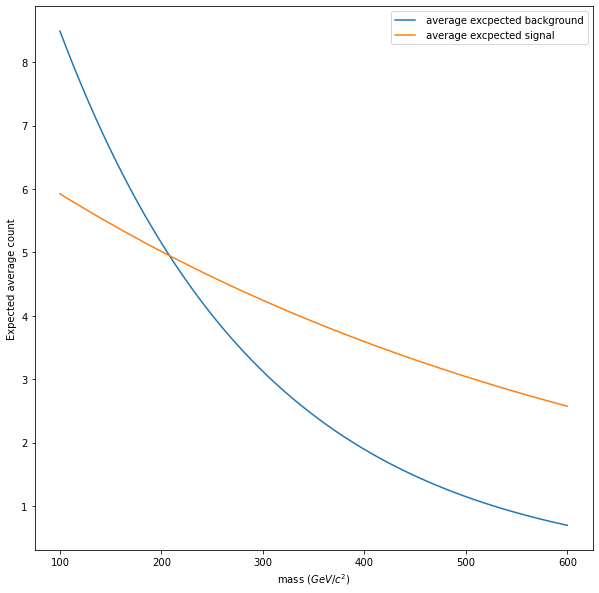

In [26]:
# plotting n_s and n_b against m_x in 100-600 gev
S = 7
B = 14
l_s = 1 / 600
l_b = 1 / 200
m_x = np.arange(100, 600, 0.1)
n_s = S * np.exp( - l_s * m_x)
n_b = B * np.exp( - l_b * m_x)
fig, ax = plt.subplots(figsize = (10,10))
ax.plot(m_x, n_b, label=" average excpected background")
ax.plot(m_x, n_s, label=" average excpected signal")
ax.set_xlabel(r"mass ($GeV/c^2$)")
ax.set_ylabel("Expected average count")
ax.legend()
plt.show()

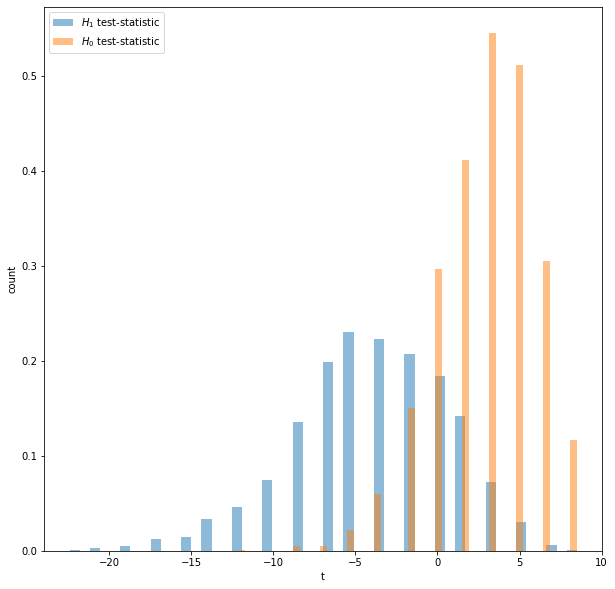

In [83]:
m_x = 300
n_s = S * np.exp( - l_s * m_x)
n_b = B * np.exp( - l_b * m_x)
h1_events = np.random.poisson(n_s + n_b, size=(2000))
h0_events = np.random.poisson(n_b, size=2000)
L_H1_H1 = poisson.pmf(h1_events, n_s + n_b)
L_H0_H1 = poisson.pmf(h1_events, n_b)
L_H1_H0 = poisson.pmf(h0_events, n_s + n_b)
L_H0_H0 = poisson.pmf(h0_events, n_b)
t_H1 = - 2 * np.log(L_H1_H1 / L_H0_H1)
t_H0 = - 2 *np.log(L_H1_H0 / L_H0_H0)
fig, ax = plt.subplots(figsize=(10,10))
t1_binned = ax.hist(t_H1, bins=50, density=True, label="$H_1$ test-statistic", alpha=0.5)[0]
t0_binned = ax.hist(t_H0, bins=50, density=True, label="$H_0$ test-statistic", alpha=0.5)[0]
ax.set_xlabel("t")
ax.set_ylabel("count")
ax.legend()
plt.show()

In [85]:
t0_binmax = np.argmax(t0_binned)
cl_sb = np.sum(t1_binned[t0_binmax:])
cl_b = 1 - np.sum(t0_binned[:t0_binmax])
cls = cl_sb / cl_b
print(cls)


5.061153045190368


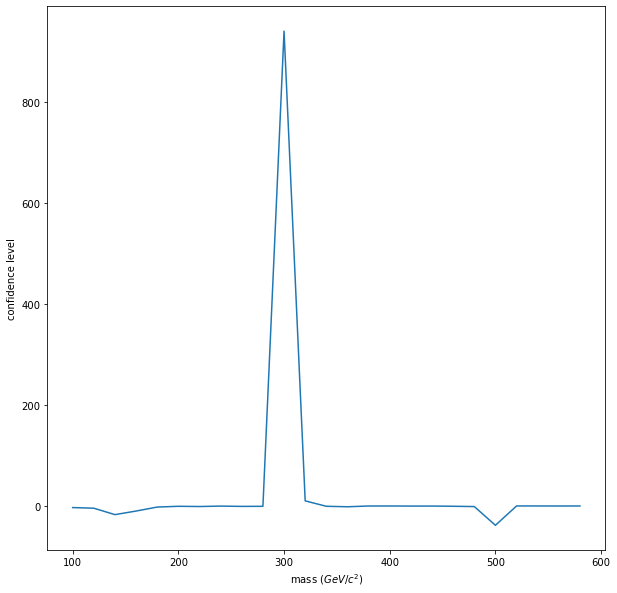

In [87]:
# repeat but for all masses in the range 100 - 600
m_xs = np.arange(100, 600, 20)
cl_ss = []
for m_x in m_xs:
    n_s = S * np.exp( - l_s * m_x)
    n_b = B * np.exp( - l_b * m_x)
    h1_events = np.random.poisson(n_s + n_b, size=(2000))
    h0_events = np.random.poisson(n_b, size=2000)
    L_H1_H1 = poisson.pmf(h1_events, n_s + n_b)
    L_H0_H1 = poisson.pmf(h1_events, n_b)
    L_H1_H0 = poisson.pmf(h0_events, n_s + n_b)
    L_H0_H0 = poisson.pmf(h0_events, n_b)
    t_H1 = - 2 * np.log(L_H1_H1 / L_H0_H1)
    t_H0 = - 2 *np.log(L_H1_H0 / L_H0_H0)
    t1_binned = np.histogram(t_H1, bins=50, density=True)[0]
    t0_binned = np.histogram(t_H0, bins=50, density=True)[0]
    t0_binmax = np.argmax(t0_binned)
    cl_sb = np.sum(t1_binned[t0_binmax:])
    cl_b = 1 - np.sum(t0_binned[:t0_binmax])
    cls = cl_sb / cl_b
    cl_ss.append(cls)
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(m_xs, cl_ss)
ax.set_xlabel("mass ($GeV/c^2$)")
ax.set_ylabel("confidence level")
plt.show()